[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MrStrange545/ML-Engineer/blob/main/Projects/Project_00/House_price_prediction.ipynb)

# Table of Contents
- [1.Problem Statement](#1.Problem-statement)
    - [1.1.Problem Teardown](#1.1.Problem-teardown)
    - [1.2.Business Objective](#1.2.Business-objective)
    - [1.3.Necessary extras](#1.3.Necessary-extras)
    - [1.4.Importing Libraries](#1.4.Importing-libraries)
- [2.Data preparation](#2.Data-preparation)
    - [2.1.Loading data](#2.1.Loading-data)
    - [2.2.Exploratory Data Analysis](#2.2.Exploratory-data-analysis)
    - [2.3.Splitting data](#2.3.Splitting-data)
- [3.Model Building](#3.Model-building)
    - [3.1.Model Architecture](#3.1.Model-architecture)
    - [3.2.Setting up device](#3.2.Setting-up-device)
    - [3.3.Loss Function and Optimizer](#3.3.Loss-function-and-optimizer)
    - [3.4.Model Training](#3.4.Model-training)
    - [3.5.Model Evaluation](#3.5.Model-evaluation)
    - [3.6.Hyperparameter Tuning](#3.6.Hyperparameter-tuning)
    - [3.7.Saving the model](#3.7.Saving-the-model)
- [4.Conclusion](#4.Conclusion)
    - [4.1.Summary of Findings](#4.1.Summary-of-findings)
    - [4.2.Future Work](#4.2.Future-work)

# 1.Problem-statement

---

## 1.1.Problem-teardown
- We are given dataset of house price with some features like no of bathrooms, no of bedrooms, etc.
- Our task is to create a model which will predict the price for any new house by looking at the features

## 1.2.Business-objective
- I am a machine learning engineer in a company `Dragon real estates` whose CEO is `Mr.Joesph`. He wanted to predict house prices as the current price prediction in the company are not getting up to the mark.
- The general norm is that company predict house prices based on the last decade house prices.
- So, to help Mr.Joesph, we will build machine learning model that can predict the prices of house given the features of house.

## 1.3.Necessary-extras
**A-imp-conversation**

- **I:** What is the business objective and end goal? How will Dragon real estates benefit from the model?
- **Mr.Joseph:** Dragon real estates will use this model to predict house prices in a given area and will invest in the area if its **undervalued.**
- **I:** How does the current solution look like? 
- **Mr.Joseph:** Manual experts who analyze the features, the predictions made by so called "experts" are not very good (error rate is 25%) which is why Dragon real estates Pvt Ltd. is counting of you.

**Important Questions**

- Which type of learning should I use Supervised, Unsupervised, or Reinforcement Learning ?
- If Supervised, then Classification or Regression ?
- Should I use Batch learning or online learning techniques?
- which Performance measure should I select?

**Answers**
- we will use Supervised learning, as we have features as well as labels.
- we will use Regression as we have to predict a number(price) not category.
- we will use batch learning as the data is quite static and it does not changes frequently. and I can retrain my model when new batch will be available in may be next 5 or 8 years.
- For our problem, I will choose RMSE.

**checking the assumptions**
- It is very important for a ML engineer to check for any assumptions he might have made and correct them before lauching the ml system.
- For example, he should make sure that the team needs the price not the categories like expensive, cheap, etc.
- If latter is the case, formulating the problem as a regression will be counted as a big mistake.
- I talked to the Dragon real estate team members and ensured that I am aware of all the assumptions.

## 1.4.Importing-libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix

# 2.Data-preparation
---

## 2.1.Loading-data

In [2]:
# Read the data
df = pd.read_csv("housing.csv")

## 2.2.Exploratory-data-analysis

The major steps are:
1. Handling missing values
2. Removing duplicates
3. checking for outliers
4. Feature Scaling
5. Feature engineering
6. Visualizing data

The substeps are:
- Read the data
- Take a look at the data by using `head()`
- check for missing values by using `info()`
- See a little description by using `describe()`
- See histogram of the data

In [3]:
# take a quick look at data
df.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# checking if there is any missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# looking at the summary of the data
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285952,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702854,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


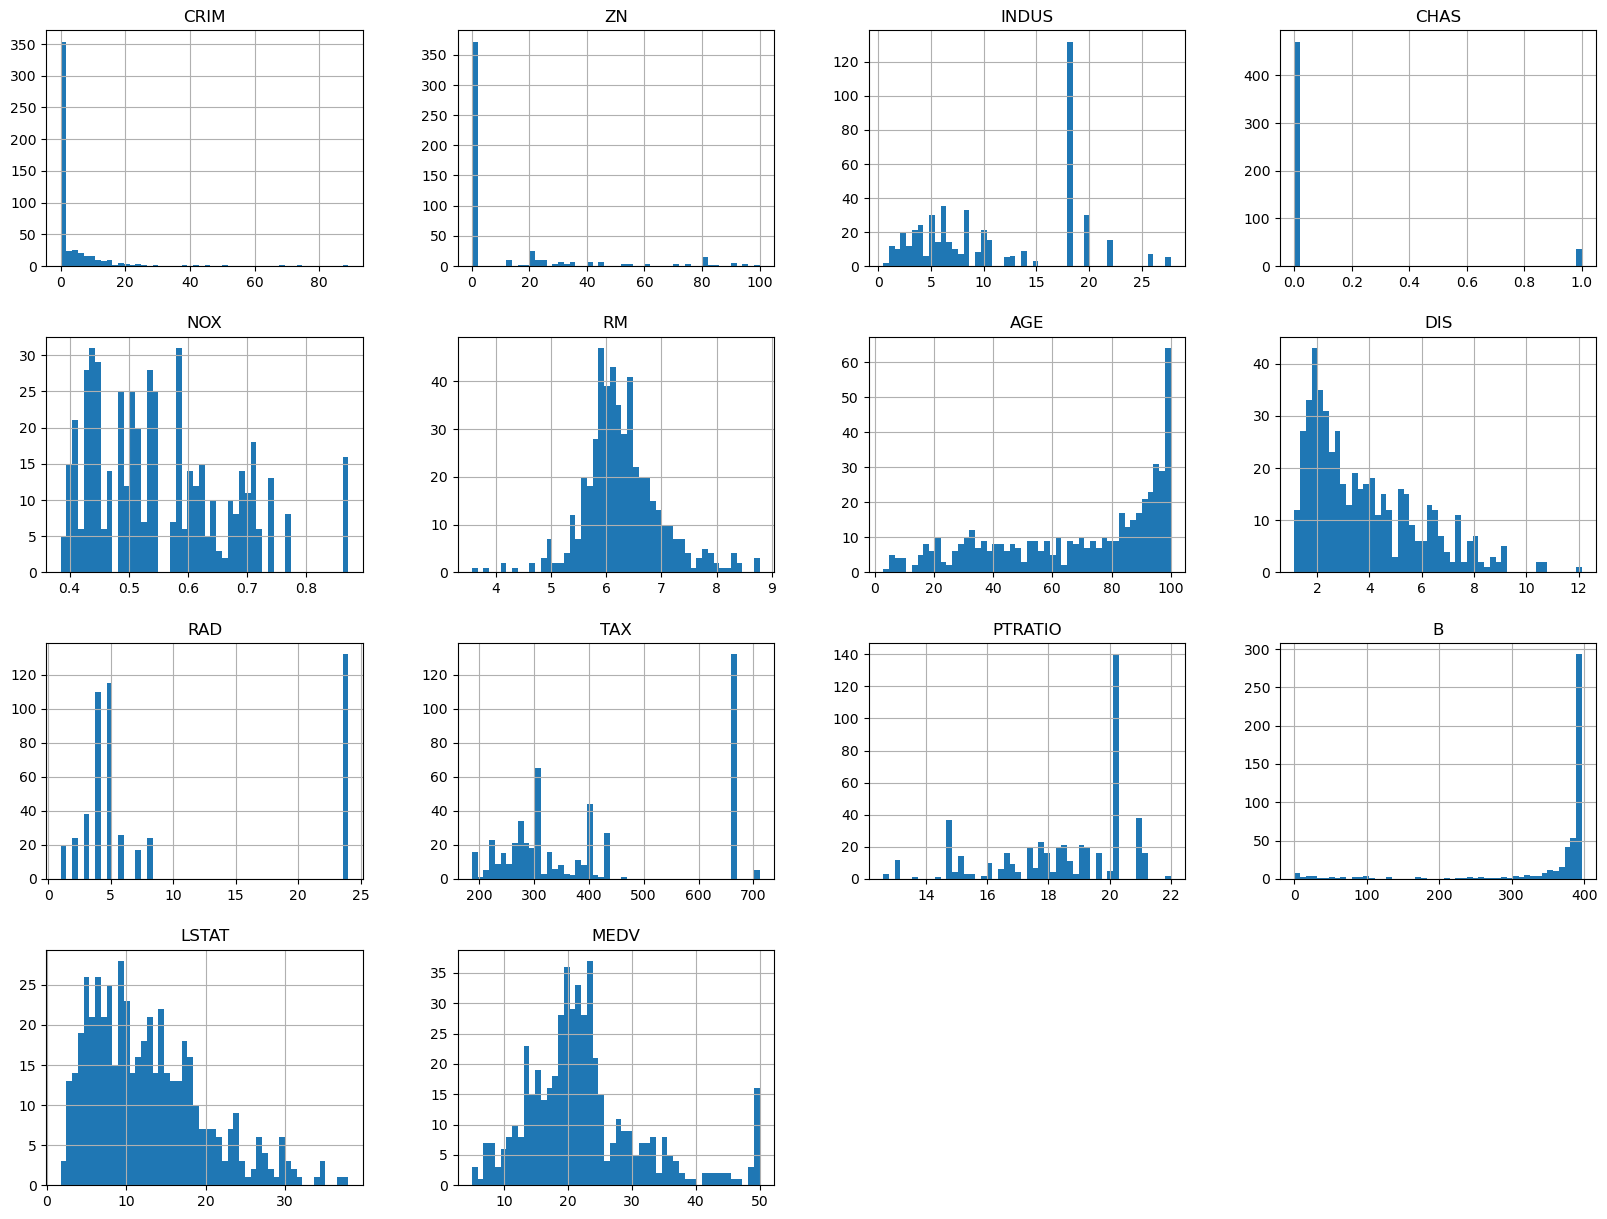

In [6]:
# Creating the histogram of the data
df.hist(bins = 50, figsize = (20,15))
plt.show()

In [7]:
# Looking for correlations
corr_matrix = df.corr() # corelaton Matrix
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.692591
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

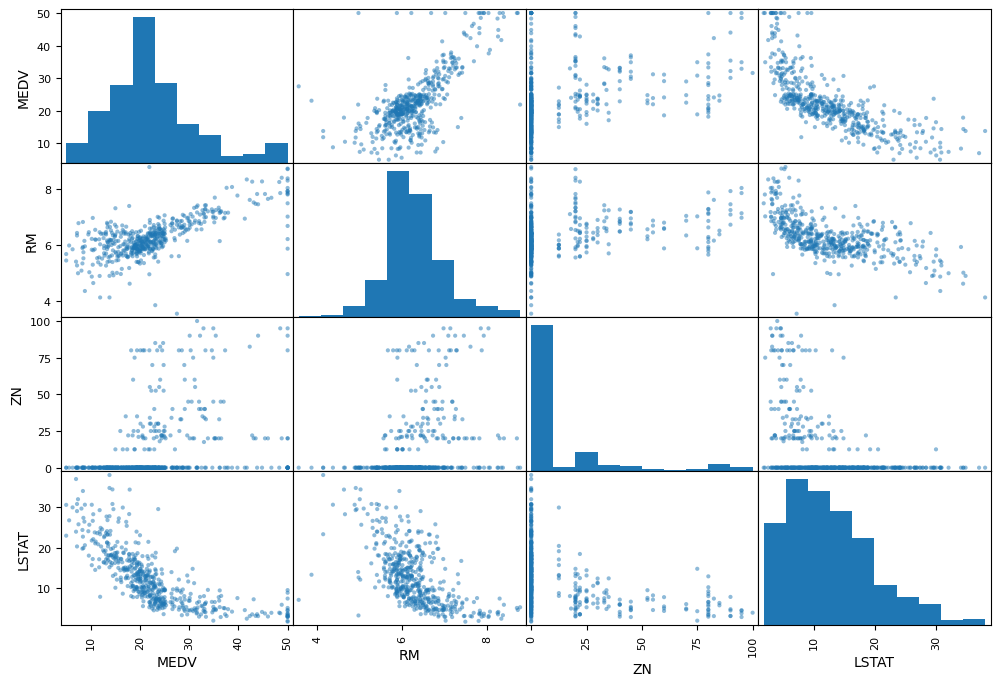

In [8]:
# Correlation plots
# here, we have 14*14 = 196 graphs, so we will only focus on important graphs

features = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(df[features], figsize = (12,8))
plt.show()

Here two plots are very interesting so, we will take deep look at them

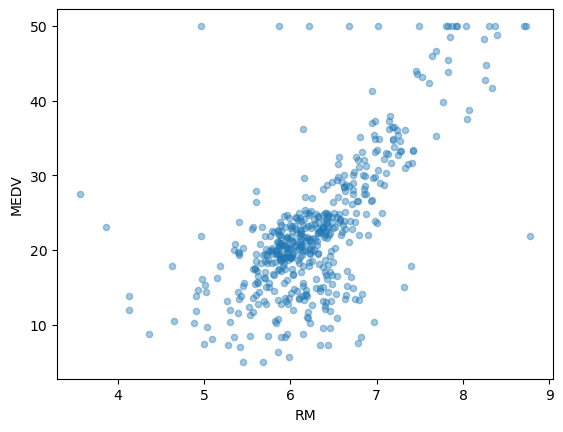

In [9]:
df.plot(kind="scatter",x="RM", y="MEDV", alpha=0.4)
plt.show()

the above graphs are useful to remove outliers from the data

In [13]:
# Let's add some features
df['TPR'] = df['TAX']/df['RM']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [11]:
coor_matrix = df.corr()
coor_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.692591
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TPR       -0.533792
LSTAT     -0.737663
Name: MEDV, dtype: float64

Through, feature engineering, we have created one variable TPR which is highly negative correlated with price.

Let's plot this

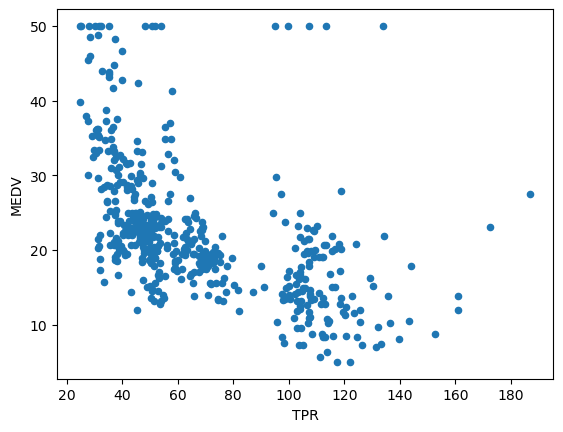

In [12]:
df.plot(kind="scatter", x = "TPR", y="MEDV")
plt.show()

### Handling missing values
to care of missing attributes, you have three options:
1. get rid of the missing data points(training examples)
2. get rid of the whole attribute
3. set the value to 0, mean, or median

In [17]:
df.dropna(subset=['RM']).shape # Option-1

(498, 15)

In [16]:
df.drop("RM", axis=1).shape # option-2

(506, 14)

In [23]:
median = df["RM"].median()
df['RM'].fillna(median).shape # options-3

(506,)

In [25]:
# this same thing can be achieved by sklearn class imputer
from sklearn.impute import SimpleImputer

# create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy = "median")

# Fit the imputer on the dataframe
imputer.fit(df) # it will only calculate what values to fill

# Transform the Dataframe to fill missing values
df_imputed = imputer.transform(df) # df_imputed is ndarray

# Converting the result back to a DataFrame
df = pd.DataFrame(df_imputed, columns=df.columns)

In [27]:
# to see what values imputer has calculated
imputer.statistics_.shape

(15,)

imputer have 15 median values one for its corresponding column.

In [28]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TPR
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284672,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,66.661892
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.697338,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,31.081063
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,44.138233
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.205000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,53.672494
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.617500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,97.564580
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,187.026116


Now, all values are completed, there are no missing values

### Scikit-learn Design
Primarily, three types of objects
1. Estimators - It estimates some parameter based on dataset
    - E.g. Imputer
    - It has the fit methods and transform method.
        - Fit method: fits the dataset and calculates internal parameters
2. Transformers - transforms method takes input and returns output
3. Predictors